# Supervised Learning and K Nearest Neighbors Exercises

![knn.png](Assets/knn.png)

# Learning Objectives:

- Explain supervised learning and how it can be applied to regression and classification problems
- Apply K-Nearest Neighbor (KNN) algorithm for classification
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code after importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions


## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [198]:
from __future__ import print_function
import os
data_path = ['data']

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearnex import patch_sklearn
# patch_sklearn()



## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [199]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath)

In [200]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [201]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [202]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [203]:
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col]) # transforming each string to number e.g. no -> 0, yes -> 1

In [204]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

msc = MinMaxScaler() # rescale the distribution to 0 and 1
ssc = StandardScaler()

SSC = 0; MSC = 1

target_column = 'churned'
target_data = data[target_column]

feature_columns = [col for col in data.columns if col != target_column]
feature_data = data[feature_columns]

target_data = pd.DataFrame(msc.fit_transform(target_data.values.reshape(-1, 1)),  # this is an np.array, not a dataframe.
                        columns=[target_column]) # np.array -> dataframe
if(SSC): 
    feature_data = pd.DataFrame(ssc.fit_transform(feature_data), columns=feature_columns)
else:
    feature_data = pd.DataFrame(msc.fit_transform(feature_data), columns=feature_columns)
    
data_scaled = pd.concat([feature_data, target_data], axis=1)


## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [205]:
print(data.head())

# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')
print(y_data)

   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0             128          0                1                     25   
1             107          0                1                     26   
2             137          0                0                      0   
3              84          1                0                      0   
4              75          1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0               99

In [206]:
knn = KNeighborsClassifier(n_neighbors=3) # 3-NN

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)
print(y_pred)

[0 0 0 ... 0 0 0]


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [207]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [208]:
print(accuracy(y_data, y_pred))

0.9164


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [209]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance') # 5-NN + added weight depending on the Euclidean Distance

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

1.0


In [210]:
knn = KNeighborsClassifier(n_neighbors=3, p=1) # 5-NN + added weight depending on the Manhattan Distance

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9182


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [211]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [212]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

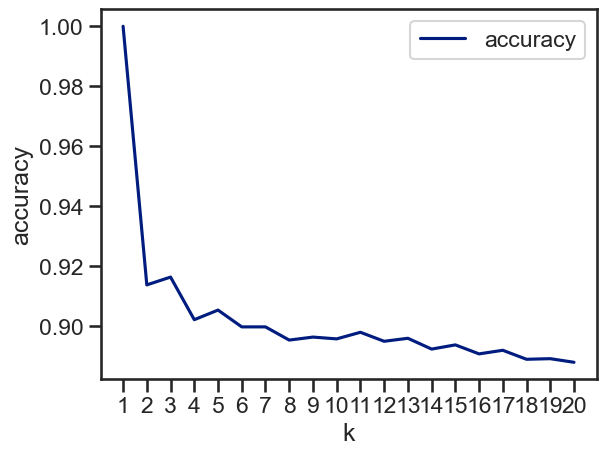

In [213]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));

accuracy decreases when k is even
accuracy increases when k is odd

accuracy when k is 5: 0.93
accuracy when k is 5 and the weight for distance is added: 1.0
-> accuracy differs a lot depending on not only by the value of k also the parameter used.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=nearest+neighbor


(Q1) MinMaxScaler을 채택하고, Manhattan vs. Euclidean distances의 성능을 비교 분석하시오 (1점).
Scaler: MinMaxScaler 

K: 7
- Manhattan distance: accuracy 92%
- Eucliedean distance: accuracy 100%

K: 5
- Manhattan distance: accuracy 93%
- Euclidean distance: accuracy 100%

K: 3
- Manhattan distance: accuracy 94%
- Euclidean distance: accuracy 100%

Scaler를 MinMaxScaler로 채택하고 K 값이 각각 7, 5, 3일 경우에 대해 weight를 Manhattan distance와 Euclidean distance에 따라 주도록 테스트 해 보았다. 그 결과 세 가지의 경우 모두 Manhattan distance로 설정했을 경우보다 Euclidean distance로 설정했을 경우 더 높은 accuracy를 보임을 확인할 수 있었다. 이를 통해 Manhattan distance로 설정했을 경우보다 Euclidean distance로 설정했을 경우 대체로 더 높은 성능을 보임을 알 수 있었다. 

이러한 결과의 연유는 두 거리의 거리 측정 방식의 차이에서 찾을 수 있다. Manhattan distance는 각 차원의 차이의 절대값을 합하여 거리를 구하는 방식이고 Euclidean distance는 각 차원의 차이의 제곱의 합의 제곱근을 구해 거리를 구하는 방식이다. 이때 삼각부등식을 고려하여 생각해 보면 Euclidean distance가 Manhattan distance보다 더 가까운 거리의 데이터일수록 가중치를 더하는 목적을 더 잘 반영하는 것임을 알 수 있다. 삼각부등식이란 삼각형에서 두 변의 길이의 합이 나머지 변의 길이보다 크거나 같다는 부등식으로 Manhattan distance는 삼각형에서 두 변의 길이의 합을 구하는 방식이고, Euclidean distance는 그 나머지 변의 길이를 재는 것으로 볼 수 있으며 그러므로 Euclidean distance 값이 Manhattan distnace 값보다 작거나 같음을 알 수 있다. 


(Q2) StandardScaler을 채택하고, Manhattan vs. Euclidean distances의 성능을 비교 분석하시오 (1점).
Scaler: StandardScaler

K: 7
- Manhattan distance: accuracy 90%
- Eucliedean distance: accuracy 100%

K: 5
- Manhattan distance: accuracy 90%
- Euclidean distance: accuracy 100%

K: 3
- Manhattan distance: accuracy 91%
- Euclidean distance: accuracy 100%

Scaler를 StandardScaler로 채택하고 K 값이 각각 7, 5, 3일 경우에 대해 weight를 Manhattan distance와 Euclidean distance에 따라 주도록 테스트 해 보았다. 그 결과 세 가지의 경우 모두 Manhattan distance로 설정했을 경우보다 Euclidean distance로 설정했을 경우 더 높은 accuracy를 보임을 확인할 수 있었다. 이를 통해 Manhattan distance로 설정했을 경우보다 Euclidean distance로 설정했을 경우 대체로 더 높은 성능을 보임을 알 수 있었다. 

이러한 결과의 연유는 Q1에서의 답변과 동일한 이유라고 생각한다. 

(Q3) NN 알고리즘의 3가지 주요 고려사항(Scaling, Distances, K-values)에 대한 실험 결과를 분석(Empirical Evidences)하고, Reasoning을 제시하시오 (1점).